<a href="https://colab.research.google.com/github/amigodrakea/IA/blob/main/Lab6/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

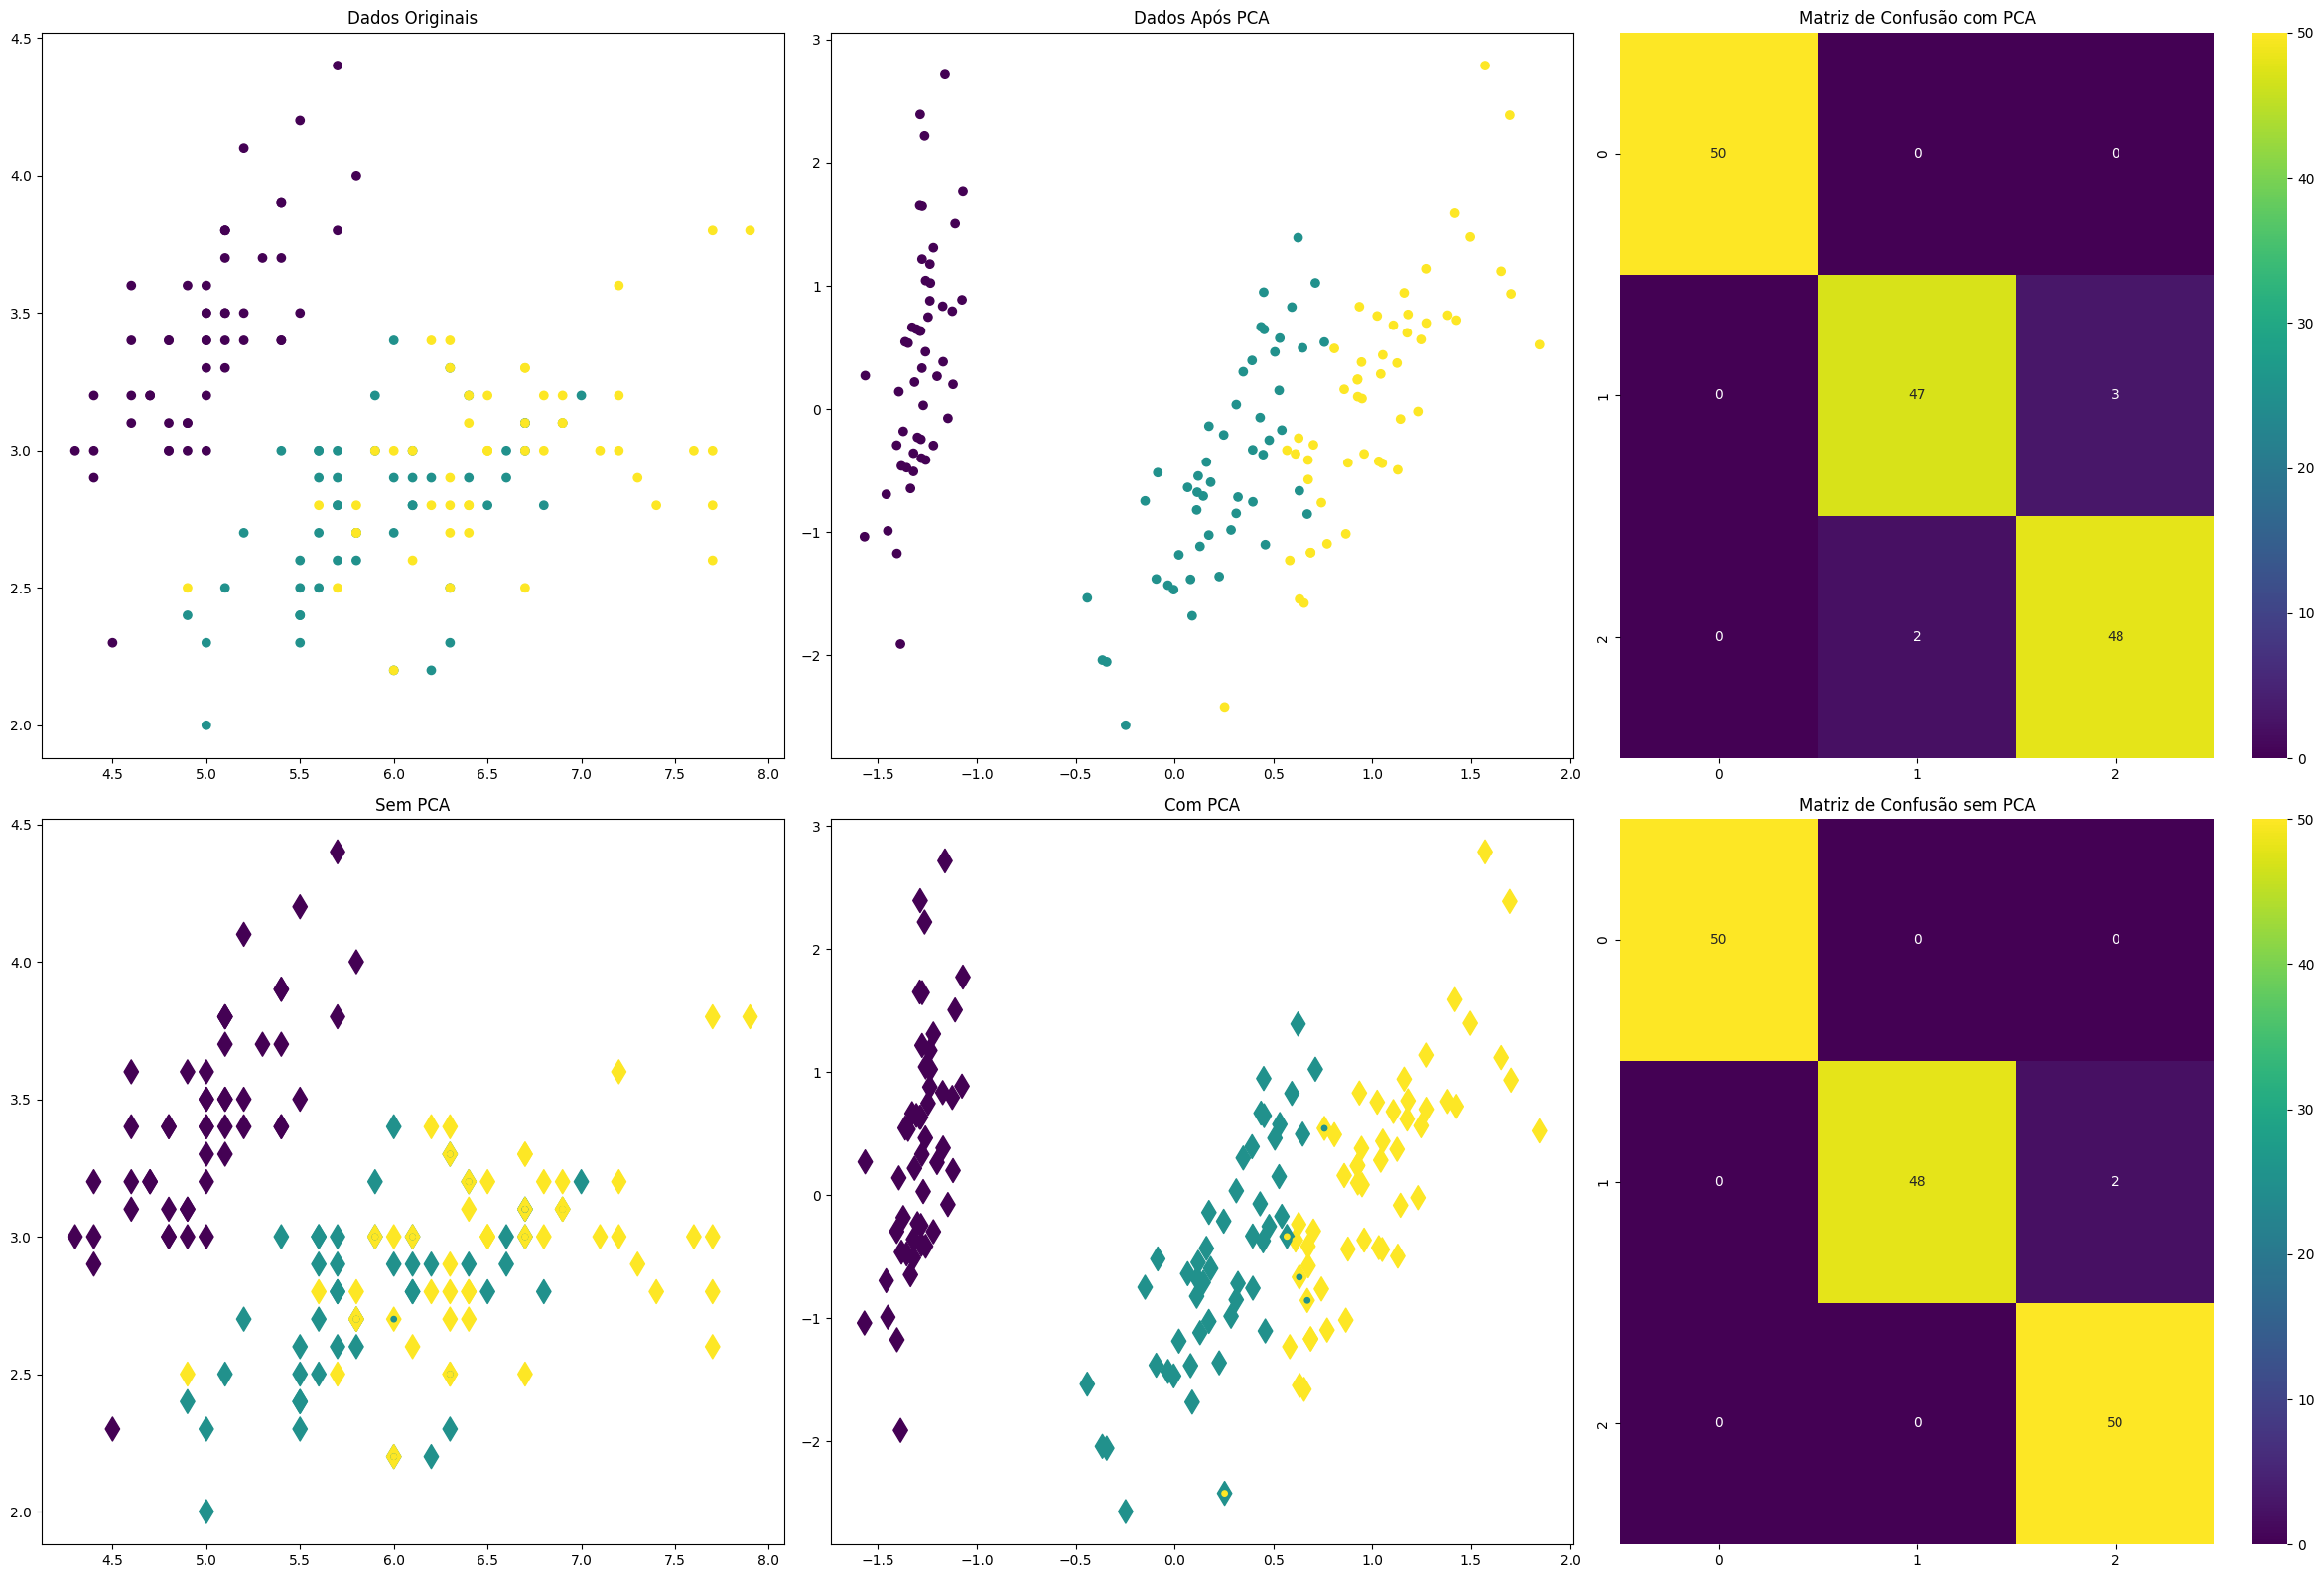

Menor erro sem PCA: 0.1700210412596801
Erro médio sem PCA: 0.2674177533080394
Mantida 97.77% da informação do conjunto inicial de dados
Menor erro com PCA: 0.2242712708078426
Erro médio com PCA: 0.28520800761384835


In [3]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = load_iris()
x = data.data
y = data.target

melhor_loss = float('inf')
melhor_loss_pca = float('inf')
lista = []
listaPCA = []
melhor_y_est = None
melhor_y_est_pca = None

fig, axs = plt.subplots(2, 3, figsize=(24, 16))

axs[0, 0].scatter(x[:, 0], x[:, 1], c=y, marker='o', cmap='viridis')
axs[0, 0].set_title('Dados Originais')


for i in range(10):
    Classificador = MLPClassifier(hidden_layer_sizes=(6), alpha=1, max_iter=1000)
    Classificador.fit(x, y)
    y_est = Classificador.predict(x)
    loss_atual = Classificador.loss_
    lista.append(loss_atual)

    if loss_atual < melhor_loss:
        melhor_loss = loss_atual
        melhor_y_est = y_est.copy()

pca = PCA(n_components=2, whiten=True, svd_solver='randomized')
pca_features = pca.fit_transform(x)
axs[0, 1].scatter(pca_features[:, 0], pca_features[:, 1], c=y, marker='o', cmap='viridis')
axs[0, 1].set_title('Dados Após PCA')

for i in range(10):
    ClassificadorPCA = MLPClassifier(hidden_layer_sizes=(5), alpha=1, max_iter=1000)
    ClassificadorPCA.fit(pca_features, y)
    y_est_pca = ClassificadorPCA.predict(pca_features)
    loss_atual_pca = ClassificadorPCA.loss_
    listaPCA.append(loss_atual_pca)

    if loss_atual_pca < melhor_loss_pca:
        melhor_loss_pca = loss_atual_pca
        melhor_y_est_pca = y_est_pca.copy()

axs[1, 0].scatter(x[:, 0], x[:, 1], c=melhor_y_est, marker='d', cmap='viridis', s=150)
axs[1, 0].scatter(x[:, 0], x[:, 1], c=y, marker='o', cmap='viridis', s=15)
axs[1, 0].set_title('Sem PCA')

axs[1, 1].scatter(pca_features[:, 0], pca_features[:, 1], c=melhor_y_est_pca, marker='d', cmap='viridis', s=150)
axs[1, 1].scatter(pca_features[:, 0], pca_features[:, 1], c=y, marker='o', cmap='viridis', s=15)
axs[1, 1].set_title('Com PCA')

matriz_confusao = confusion_matrix(y, melhor_y_est)
sns.heatmap(matriz_confusao, annot=True, ax=axs[1, 2], cmap='viridis')
axs[1, 2].set_title('Matriz de Confusão sem PCA')

matriz_confusao_pca = confusion_matrix(y, melhor_y_est_pca)
sns.heatmap(matriz_confusao_pca, annot=True, ax=axs[0, 2], cmap='viridis')
axs[0, 2].set_title('Matriz de Confusão com PCA')

plt.tight_layout()
plt.show()

print(f"Menor erro sem PCA: {melhor_loss}")
print(f"Erro médio sem PCA: {np.mean(lista)}")
print('Mantida %5.2f%% da informação do conjunto inicial de dados' % (sum(pca.explained_variance_ratio_) * 100))
print(f"Menor erro com PCA: {melhor_loss_pca}")
print(f"Erro médio com PCA: {np.mean(listaPCA)}")
